# Setup

# TODO:

priorities:

figure 5
instead of showing raw masks - show the peaks used to select the bandwidths

- power analysis for aim 2
- measures for aim 2 (better than the ones we have? look at interaction)

In [1]:
include(joinpath("..","src","setup.jl"))

┌ Warning: Package RCall does not have AxisArrays in its dependencies:
│ - If you have RCall checked out for development and have
│   added AxisArrays as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with RCall
│ Loading AxisArrays into RCall from project dependency, future warnings for RCall are suppressed.
└ @ nothing nothing:840
┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v1.1/AuditoryBistabilityLE/RqG8S.ji for AuditoryBistabilityLE [7e25a372-ade5-11e8-17af-a30e5a9e2c28]
└ @ Base loading.jl:1184


┌ Warning: combine(gd) is deprecated, use DataFrame(gd) instead
│   caller = |>(::GroupedDataFrame{DataFrame}, ::typeof(combine)) at operators.jl:813
└ @ Base ./operators.jl:813
┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/davidlittle/.julia/packages/Gadfly/ew1SM/src/mapping.jl:228


RObject{VecSxp}
$rcalljl_options
$rcalljl_options$height
[1] 360

$rcalljl_options$width
[1] 432




In [2]:
datadir = joinpath("..","data","count_lengths","run_2018-11-26")

"../data/count_lengths/run_2018-11-26"

In [3]:
params = load_params(joinpath(datadir,"params.jld2"))
params[:pindex] = 1:size(params,1)
settings = joinpath("..","src","settings.toml")

results = []
for_results_in(joinpath(datadir,"data"),reinterpret="reinterpret") do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df = vcat(results...);
head(df)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[3]:13
└ @ Core In[3]:13


,length,percepts,created,pindex
,Float64,Int64,DateTime,Int64
1,0.2,2,2018-11-26T17:38:30.128,1
2,11.4,1,2018-11-26T17:38:30.128,1
3,0.4,2,2018-11-26T17:38:30.128,1
4,5.1,1,2018-11-26T17:38:30.128,1
5,0.4,2,2018-11-26T17:38:30.128,1
6,18.6,1,2018-11-26T17:38:30.128,1


# Figure 3A

In [4]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]
progress = Progress(nrow(unique(params[fields])))
herr = human_error()
df_summary = by(params,fields) do row
    next!(progress)
    err = model_error(df,params;(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths,eratio = error_ratio(err,herr))
end

┌ Warning: combine(gd) is deprecated, use DataFrame(gd) instead
│   caller = |>(::GroupedDataFrame{DataFrame}, ::typeof(combine)) at operators.jl:813
└ @ Base ./operators.jl:813
Progress: 100%|█████████████████████████████████████████| Time: 0:00:07


,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,stream_error,length_error,eratio
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.498731,0.340946,2.52363
2,0.0,5.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.270752,0.304058,1.54993
3,0.0,15.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.243425,0.356831,1.51971
4,0.0,44.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.242422,0.999453,2.48746
5,0.0,130.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.242879,0.999453,2.48929
6,0.0,390.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.242616,0.999453,2.48823
7,0.0,1100.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.259893,0.630528,1.9999
8,0.0,3400.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.243275,0.999453,2.49089
9,0.0,10000.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.243464,0.999453,2.49165


In [5]:
dfplot_ind = @linq df_summary |>
    rename_levels_for([:stream_error,:length_error,:eratio]) |>
    transform(a = packaxes(:c_a,pad=0.25), m = packaxes(:c_m,pad=0.25), rand = randn(length(:c_a))) |>
    transform(eratio_str = fmt.("01.1f",round.(:eratio,digits=1)))
              
head(dfplot_ind)

┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[5]:5
└ @ Core In[5]:5


,c_a,c_m,level,stream_error,length_error,eratio,a,m,rand,eratio_str
,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64,Float64,String
1,0.0,0.0,Peripheral,0.498731,0.340946,2.52363,0.0,0.0,2.67326,2.5
2,0.0,5.0,Peripheral,0.270752,0.304058,1.54993,0.0,1.25,0.556548,1.5
3,0.0,15.0,Peripheral,0.243425,0.356831,1.51971,0.0,2.25,-0.61864,1.5
4,0.0,44.0,Peripheral,0.242422,0.999453,2.48746,0.0,3.25,-0.193661,2.5
5,0.0,130.0,Peripheral,0.242879,0.999453,2.48929,0.0,4.25,-0.345496,2.5
6,0.0,390.0,Peripheral,0.242616,0.999453,2.48823,0.0,5.25,0.726401,2.5


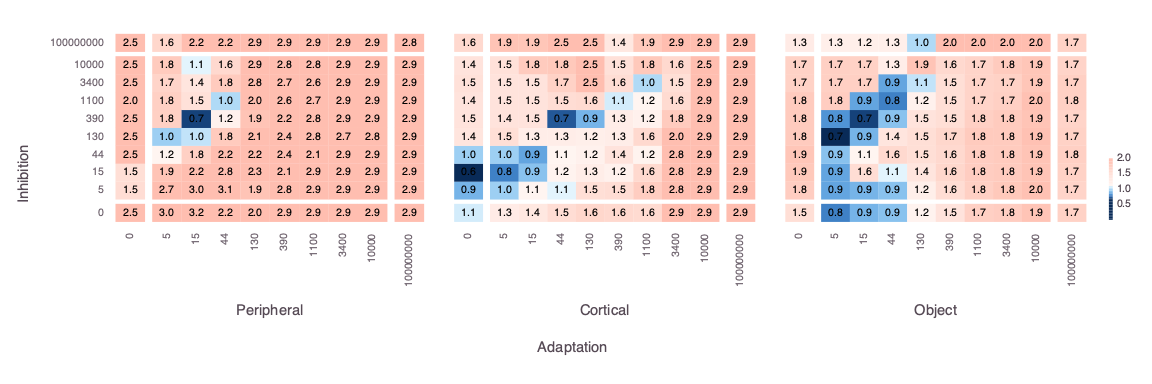

false

In [6]:
xvals = sort!(unique(dfplot_ind.a));
yvals = sort!(unique(dfplot_ind.m));

pl = plot(dfplot_ind,x=:a,y=:m,color=:eratio,xgroup=:level,label=:eratio_str,
     Geom.subplot_grid(Geom.label(position=:centered),Geom.rectbin,Coord.cartesian(ymin=0,xmin=0),
                       Scale.x_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_a,pad=0.25)),
                       Scale.y_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot_ind.c_m,pad=0.25)),
                       Guide.xticks(ticks=xvals,orientation=:vertical),
                       Guide.yticks(ticks=yvals,orientation=:horizontal)),
     Guide.xlabel("Adaptation"), Guide.ylabel("Inhibition"),
     Scale.color_continuous(minvalue=0,maxvalue=2,colormap=colorscale("RdBu",reverse=true,minvalue=0.0,
            maxvalue=2,colorstop=4,colorstart=0.65,midvalue=1.15)),
     Guide.colorkey(title=""),
     Theme(grid_line_width=0inch,point_label_font_size=8pt,point_label_color=colorant"black"))
draw(PDF(joinpath(plotdir,"fig3A.pdf"),8.5inch,3.5inch),pl)
draw(PNG(12inch,4inch),pl)

# Figure 3B-C

In [8]:
using DependentBootstrap

In [8]:
head(dfplot_ind)

┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[8]:1
└ @ Core In[8]:1


,c_a,c_m,level,stream_error,length_error,eratio,a,m,rand,eratio_str
,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64,Float64,String
1,0.0,0.0,Peripheral,0.498731,0.340946,2.52363,0.0,0.0,-0.722999,2.5
2,0.0,5.0,Peripheral,0.270752,0.304058,1.54993,0.0,1.25,0.0259617,1.5
3,0.0,15.0,Peripheral,0.243425,0.356831,1.51971,0.0,2.25,0.379949,1.5
4,0.0,44.0,Peripheral,0.242422,0.999453,2.48746,0.0,3.25,0.842513,2.5
5,0.0,130.0,Peripheral,0.242879,0.999453,2.48929,0.0,4.25,-1.09071,2.5
6,0.0,390.0,Peripheral,0.242616,0.999453,2.48823,0.0,5.25,-0.0907822,2.5


In [10]:
hstr,hlen = human_error_by_sid();
dfstr_ind = vcat(DataFrame(kind=dfplot_ind.level,error=dfplot_ind.stream_error),DataFrame(kind="human",error=hstr.x1));
dflen_ind = vcat(DataFrame(kind=dfplot_ind.level,error=dfplot_ind.length_error),DataFrame(kind="human",error=hlen.x1));

In [11]:
mean(hstr.x1)

0.12418296912627243

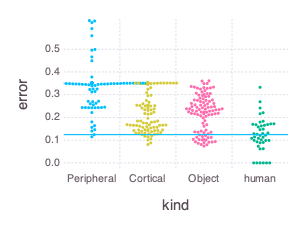

In [12]:
strplot = plot(dfstr_ind,y=:error,x=:kind,color=:kind,intercept=[mean(hstr.x1)],slope=[0],Geom.abline,Geom.beeswarm(padding=0.05mm),
    Coord.cartesian(ymax=0.6,ymin=0.0),Theme(key_position=:none,point_size=0.4mm))
draw(PNG(3.2inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig3C.pdf"),3.2inch,2.5inch),strplot)

In [13]:
mean(hlen.x1)

0.33064121247892525

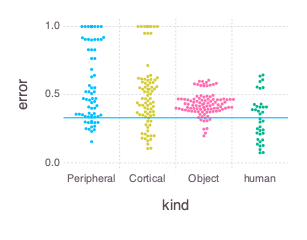

In [14]:
strplot = plot(dflen_ind,y=:error,x=:kind,color=:kind,intercept=[mean(hlen.x1)],slope=[0],Geom.abline,
    Geom.beeswarm(padding=0.05mm),Theme(key_position=:none,point_size=0.4mm))
draw(PNG(3.2inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig3D.pdf"),3.2inch,2.5inch),strplot)

todo: I think the below bootstrap approach is unnecessary: i can just indicate the estimated standard error of the individual model estimates; this should be quite small, and so there should be strong confidence in the overall result.

In [133]:
bootstats = CSV.read("bootstats.csv")
head(bootstats)

,level,mean,min
,String⍰,Float64⍰,Float64⍰
1,Peripheral,2.6322,0.90404
2,Cortical,1.91128,0.747204
3,Object,1.48796,0.680741
4,Peripheral,2.6322,0.90404
5,Cortical,1.91128,0.747204
6,Object,1.48796,0.680741


In [ ]:
num_sims = 20
allbootstats = []
params6 = @where(params,:Δf .== 6)
@showprogress for indices in dbootinds(1:num_sims,numresample=1000)
    df_summary = by(params6,fields) do row
        err = model_error(df,params;(k => row[1,k] for k in fields)...)
        DataFrame(eratio = error_ratio(err))
    end
    push!(allbootstats,by(rename_levels_for(df_summary,:eratio),:level) do x
        DataFrame(mean = mean(x.eratio),min = minimum(x.eratio))
    end)
end

In [52]:
bootstats = vcat(allbootstats...)
CSV.write("bootstats.csv",bootstats)

"bootstats.csv"

In [53]:
stats = by(bootstats,:level) do x
    meanl,meanu = quantile(skipmissing(x.mean),[0.025,0.975])
    minl,minu = quantile(skipmissing(x.min),[0.025,0.975])
    DataFrame(mean = mean(skipmissing(x.mean)),meanl = meanl,meanu = meanu,
        min = mean(skipmissing(x.min)),minl = minl,minu = minu)
end

,level,mean,meanl,meanu,min,minl,minu
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,Peripheral,2.6322,2.6322,2.6322,0.90404,0.90404,0.90404
2,Cortical,1.91128,1.91128,1.91128,0.747204,0.747204,0.747204
3,Object,1.48796,1.48796,1.48796,0.680741,0.680741,0.680741


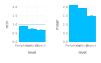

In [57]:
pl = hstack(plot(stats,x=:level,y=:min,ymin=:minl,ymax=:minu,intercept=[1.0],slope=[0],
                Geom.errorbar,Geom.bar,Geom.abline,Coord.cartesian(ymax=2.0),Guide.xticks(orientation=:horizontal)),
            plot(stats,x=:level,y=:mean,ymin=:meanl,ymax=:meanu,Geom.errorbar,
                Geom.bar,Coord.cartesian(ymax=2.0),Guide.xticks(orientation=:horizontal)))
draw(SVG(4inch,2.5inch),pl)

# Figure 2

In [132]:
best_models = @where(df_summary,:eratio .<= 1.1)[[:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]]
best_params = map(AuditoryBistabilityLE.read_params,eachrow(best_models))
len = plot_lengths_data(df,params,best_params,normlengths=true)

simulation
human


(human = [4.57939, 4.47308, 2.47937, 4.3666, 4.84835, 4.36677, 5.36654, 2.10611, 6.46179, 2.7427  …  22.6935, 5.67342, 4.28869, 47.3811, 5.5344, 4.05252, 2.71941, 4.55431, 3.36052, 1.23121], simulation = [3.06481, 7.93368, 6.40652, 21.8155, 2.03446, 11.3302, 10.1585, 15.4831, 1.07766, 15.646  …  98.758, 1.17264, 1.83422, 15.4747, 47.4921, 1.37346, 190.268, 5.96825, 268.869, 23.8224])

In [133]:
p1 = plot_stream(df,params,best_params);

In [134]:
using RCall

In [135]:
R"library(logKDE)"
xmax = 20
dens1 = R"logdensity($(len.human),to=$xmax,bw='logG')";
dens2 = R"logdensity($(len.simulation),to=$xmax,bw='logG')";

x1 = collect(R"$(dens1)[['x']]");
y1 = collect(R"$(dens1)[['y']]");
x2 = collect(R"$(dens2)[['x']]");
y2 = collect(R"$(dens2)[['y']]");
dens = DataFrame(x=[x1;x2],y=[y1;y2],experiment=[fill("human",length(x1));fill("simulation",length(x2))])

p2 = plot(dens,x=:x,y=:y,ymax=:y,ymin=fill(0,size(dens,1)),color=:experiment,Geom.line,Geom.ribbon,
         Guide.colorkey(pos=[0.5*Gadfly.w,-0.3*Gadfly.h]),
         Theme(lowlight_color=c->RGBA{Float32}(c.r, c.g, c.b, 0.3)),
         Coord.cartesian(xmin=0,xmax=xmax));

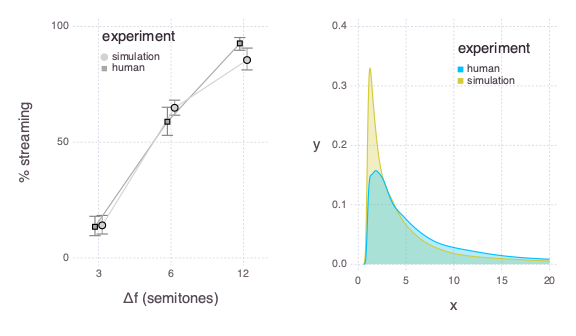

In [136]:
draw(PNG(6inch,3.5inch),hstack(p1,p2))
draw(PDF(joinpath(plotdir,"fig2_raw.pdf"),5inch,2.5inch),hstack(p1,p2))

# Figure 4

In [98]:
datadir_all = joinpath("..","data","count_lengths","run_2018-11-28")
datadir_selected = joinpath("..","data","count_lengths","run_2018-11-30")

"../data/count_lengths/run_2018-11-30"

In [99]:
params_all = load_params(joinpath(datadir_all,"params.jld2"))
params_all[:pindex] = 1:size(params_all,1)
settings = joinpath(srcdir,"settings.toml")

results = []
for_results_in(joinpath(datadir_all,"data")) do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df_all = vcat(results...);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:30


In [106]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]
progress = Progress(nrow(unique(params_all[fields])))
herr = human_error()
df_summary_all = by(params_all,fields) do row
    next!(progress)
    err = model_error(df_all,params_all;(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths,eratio = error_ratio(err,herr),pindex = row.pindex[1])
end

Progress: 100%|█████████████████████████████████████████| Time: 0:01:29


,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,stream_error,length_error,eratio,pindex
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.323352,0.24583,1.67366,1
2,0.0,5.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.308735,0.27519,1.65921,2
3,0.0,63.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.237616,0.978323,2.43615,3
4,0.0,790.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.237616,0.978323,2.43615,4
5,0.0,10000.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.237616,0.978323,2.43615,5
6,0.0,0.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.319442,0.251511,1.66651,6
7,0.0,5.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.318658,0.229664,1.63032,7
8,0.0,63.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.237616,0.978323,2.43615,8
9,0.0,790.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.237616,0.978323,2.43615,9


In [120]:
params_selected = load_params(joinpath(datadir_selected,"params.jld2"))
params_selected[:pindex] = 1:size(params_selected,1)
settings = joinpath(srcdir,"settings.toml")

results = []
for_results_in(joinpath(datadir_selected,"data")) do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df_selected = vcat(results...);

┌ Warning: Using old parameter file format, run `clean_up_param_files.jl`
└ @ Main /Users/davidlittle/Documents/work/projects/bistable/src/parameters.jl:52
Progress: 100%|█████████████████████████████████████████| Time: 0:00:10


In [121]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]
progress = Progress(nrow(unique(params_selected[fields])))
df_summary_selected = by(params_selected,fields) do row
    next!(progress)
    err = model_error(df_selected,params_selected;(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths, eratio = error_ratio(err,herr),pindex = row.pindex[1])
end

Progress:  87%|███████████████████████████████████▉     |  ETA: 0:00:01┌ Warning: Expected 3 parameter entries. 
│ Instead, only found entires: 2×36 DataFrame
│ │ Row │ f_W_m_σ │ f_c_m   │ t_c_a   │ t_c_m   │ f         │ t_W_m_c │ t_c_x   │ f_c_x   │ t_W_m_σ_t │ s_τ_σ     │ f_c_a   │ f_c_σ   │ s_c_m   │ f_τ_a     │ s_c_σ   │ Δt        │ s_τ_m     │ s_c_x   │ t_W_m_σ_ϕ │ t_τ_a     │ s_c_a   │ t_τ_m     │ t_c_σ   │ t_τ_x     │ s_W_m_c │ s_τ_a     │ f_W_m_c │ t_τ_σ     │ f_τ_σ     │ f_τ_x     │ Δf    │ t_W_m_σ_N │ f_τ_m     │ s_τ_x     │ s_W_m_σ │ pindex │
│ │     │ Float64 │ Float64 │ Float64 │ Float64 │ Quantity… │ Float64 │ Float64 │ Float64 │ Float64   │ Quantity… │ Float64 │ Float64 │ Float64 │ Quantity… │ Float64 │ Quantity… │ Quantity… │ Float64 │ Float64   │ Quantity… │ Float64 │ Quantity… │ Float64 │ Quantity… │ Float64 │ Quantity… │ Float64 │ Quantity… │ Quantity… │ Quantity… │ Int64 │ Float64   │ Quantity… │ Quantity… │ Float64 │ Int64  │
│ ├─────┼─────────┼─────────┼─────────┼

,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,stream_error,length_error,eratio,pindex
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,5.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.127154,0.248804,0.888207,1
2,5.0,5.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.443723,0.226333,2.12883,2
3,5.0,63.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.135096,0.529185,1.34418,3
4,5.0,0.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.152268,0.19362,0.905874,4
5,5.0,5.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.444997,0.207696,2.10578,5
6,5.0,63.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.13456,0.528276,1.34065,6
7,5.0,0.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2,0.146464,0.222802,0.926633,7
8,5.0,5.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2,0.436585,0.212728,2.07952,8
9,5.0,63.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2,0.130994,0.518901,1.31211,9


In [122]:
# if there is a selected entry with a revised eratio, use that value

df_summary_selected[:procedure] = "selected"
df_summary_all[:procedure] = "survey"
function favor_selected(vals,procedure)
    selected = findfirst(procedure .== "selected")
    if selected isa Nothing
        @assert length(vals) == 1
        first(vals)
    else
        vals[selected]
    end
end
    
df_summary_multi = @linq vcat(df_summary_all,df_summary_selected) |>
    by(fields,eratio = favor_selected(:eratio,:procedure),
              stream_error = favor_selected(:stream_error,:procedure),
              length_error = favor_selected(:length_error,:procedure))
head(df_summary_multi)

┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[122]:19
└ @ Core In[122]:19


,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,eratio,stream_error,length_error
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,1.67366,0.323352,0.24583
2,0.0,5.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,1.65921,0.308735,0.27519
3,0.0,63.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,2.43615,0.237616,0.978323
4,0.0,790.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,2.43615,0.237616,0.978323
5,0.0,10000.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,2.43615,0.237616,0.978323
6,0.0,0.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,1.66651,0.319442,0.251511


In [123]:
mlevels = [(vars = [:f_c_a,:f_c_m], name = "Peripheral"),
          (vars = [:s_c_a,:s_c_m], name = "Cortical"),
          (vars = [:t_c_a,:t_c_m], name = "Object")]
dflevels = map(mlevels) do level
    result = by(df_summary_multi,level.vars) do slice
       DataFrame(c_a = first(slice[level.vars[1]]),c_m = first(slice[level.vars[2]]),
                 level = level.name, 
                 eratio = minimum(skipmissing(slice.eratio)),
                 stream_error = slice.stream_error[argmin(coalesce.(slice.eratio,-Inf))],
                 length_error = slice.length_error[argmin(coalesce.(slice.eratio,-Inf))])
            
    end
    result[[:c_a,:c_m,:level,:eratio,:stream_error,:length_error]]
end

dfplot = @linq vcat(dflevels...) |>
    transform(a = packaxes(:c_a,maxpad=false), m = packaxes(:c_m,maxpad=false)) |>
    transform(eratio_str = fmt.("01.2f",round.(:eratio,digits=2)))
head(dfplot)

┌ Warning: `head(df::AbstractDataFrame)` is deprecated, use `first(df, 6)` instead.
│   caller = top-level scope at In[123]:19
└ @ Core In[123]:19


,c_a,c_m,level,eratio,stream_error,length_error,a,m,eratio_str
,Float64,Float64,String,Float64,Float64,Float64,Float64,Float64,String
1,0.0,0.0,Peripheral,1.0385,0.228196,0.0791615,0.0,0.0,1.04
2,0.0,5.0,Peripheral,0.674383,0.109395,0.154691,0.0,1.5,0.67
3,0.0,63.0,Peripheral,0.931289,0.167926,0.168737,0.0,2.5,0.93
4,0.0,790.0,Peripheral,0.876929,0.136545,0.216342,0.0,3.5,0.88
5,0.0,10000.0,Peripheral,0.849308,0.13018,0.215023,0.0,4.5,0.85
6,5.0,0.0,Peripheral,0.591868,0.0961476,0.135396,1.5,0.0,0.59


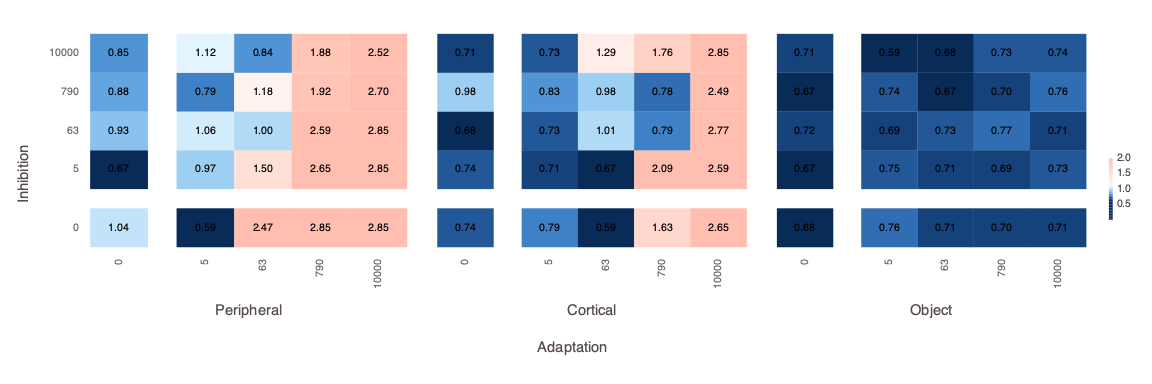

false

In [124]:
xvals = sort!(unique(dfplot.a));
yvals = sort!(unique(dfplot.m));

pl = plot(dfplot,x=:a,y=:m,color=:eratio,xgroup=:level,label=:eratio_str,
     Geom.subplot_grid(Geom.label(position=:centered),Geom.rectbin,Coord.cartesian(ymin=0,xmin=0),
                       Scale.x_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot.c_a,maxpad=false)),
                       Scale.y_continuous(labels=string ∘ Int ∘ packaxes_invfn(dfplot.c_m,maxpad=false)),
                       Guide.xticks(ticks=xvals,orientation=:vertical),
                       Guide.yticks(ticks=yvals,orientation=:horizontal)),
     Guide.xlabel("Adaptation"), Guide.ylabel("Inhibition"),
     Guide.colorkey(title=""),
     Scale.color_continuous(minvalue=0,maxvalue=2,colormap=colorscale("RdBu",reverse=true,minvalue=0.0,
            maxvalue=2,colorstop=4,colorstart=0.65,midvalue=1.15)),
     Theme(grid_line_width=0inch,point_label_font_size=8pt,point_label_color=colorant"black"))
draw(PDF(joinpath(plotdir,"fig4A.pdf"),7.75inch,3.5inch),pl)
draw(PNG(12inch,4inch),pl)

# Figure 4B-C

In [127]:
hstr,hlen = human_error_by_sid();
dfstr_mul = vcat(DataFrame(kind=dfplot.level,error=dfplot.stream_error),DataFrame(kind="human",error=hstr.x1));
dflen_mul = vcat(DataFrame(kind=dfplot.level,error=dfplot.length_error),DataFrame(kind="human",error=hlen.x1));

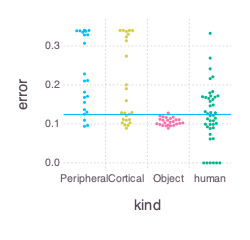

In [128]:
strplot = plot(dfstr_mul,y=:error,x=:kind,color=:kind,intercept=[mean(hstr.x1)],slope=[0],Geom.abline,Geom.beeswarm(padding=0.05mm),
    Coord.cartesian(ymax=0.35),Theme(key_position=:none,point_size=0.4mm),Guide.xticks(orientation=:horizontal))
draw(PNG(2.6inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig4C.pdf"),3.2inch,2.5inch),strplot)

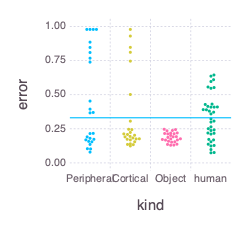

In [129]:
strplot = plot(dflen_mul,y=:error,x=:kind,color=:kind,intercept=[mean(hlen.x1)],slope=[0],Geom.abline,
    Geom.beeswarm(padding=0.05mm),Theme(key_position=:none,point_size=0.4mm),Guide.xticks(orientation=:horizontal))
draw(PNG(2.6inch,2.5inch),strplot)
draw(PDF(joinpath(plotdir,"fig4D.pdf"),3.2inch,2.5inch),strplot)

In [130]:
stats = by(vcat(dflevels...),:level) do x
    DataFrame(mean = mean(skipmissing(x.eratio)),min = minimum(skipmissing(x.eratio)))
end

,level,mean,min
,String,Float64,Float64
1,Peripheral,1.66169,0.591868
2,Cortical,1.3036,0.591868
3,Object,0.709363,0.591868
